In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
df= pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
for i in df.columns:
    print(i)
df.head()


Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().values.any()

False

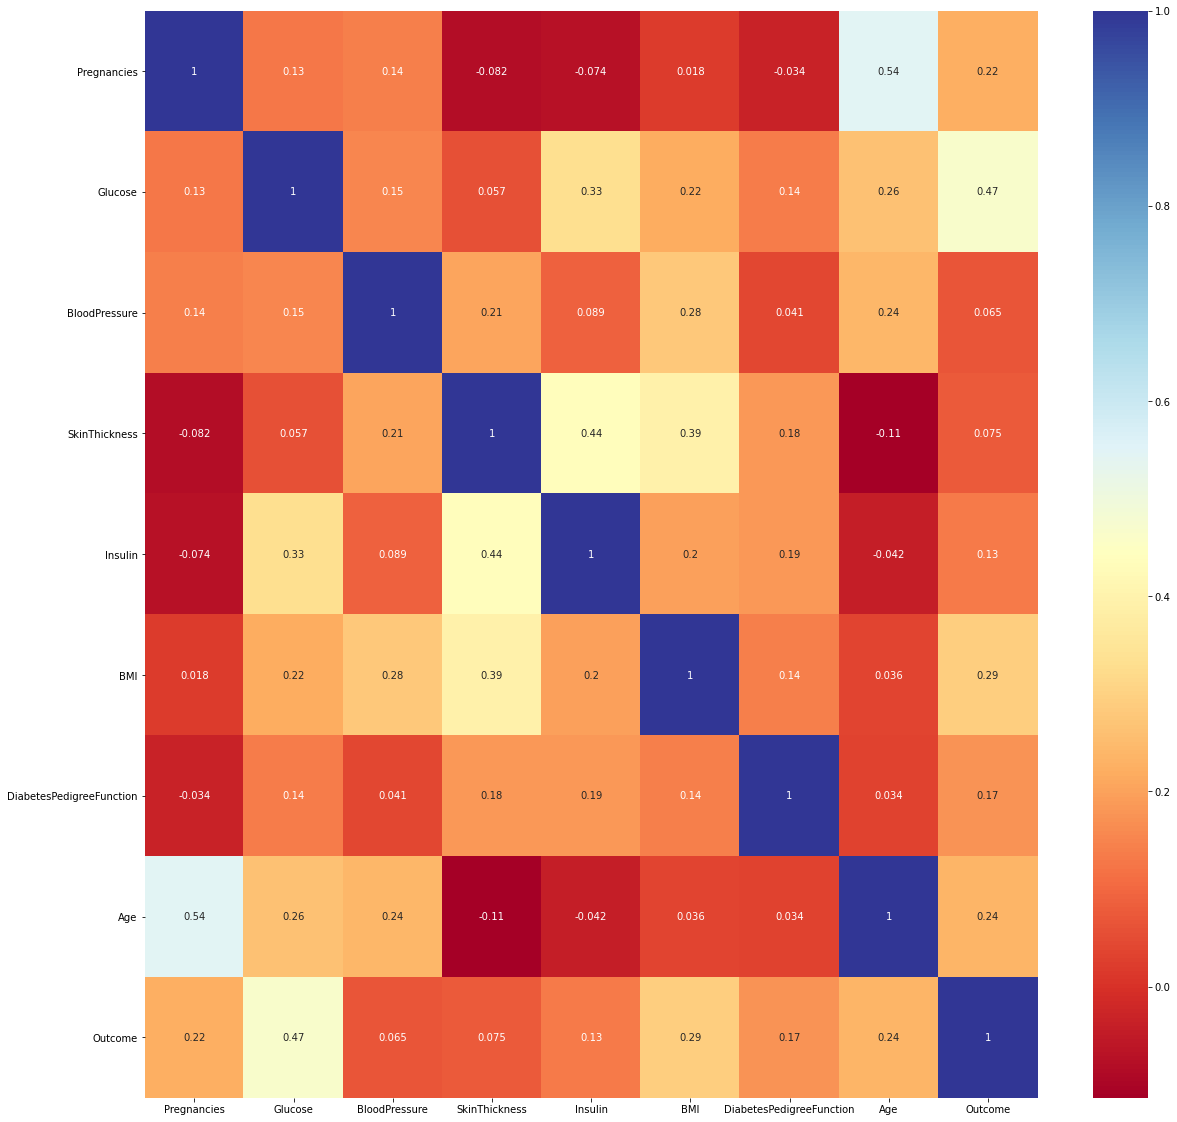

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt 
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlBu")

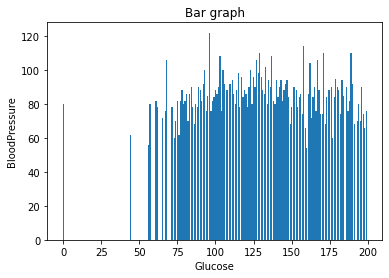

In [6]:
plt.bar(df['Glucose'], df['BloodPressure'], align = 'center') 
#plt.bar(x2, y2, color = 'g', align = 'center') 
plt.title('Bar graph') 
plt.ylabel('BloodPressure') 
plt.xlabel('Glucose')  

plt.show()

In [7]:
diabetes_map= {True:1, False:0}
df['Outcome']= df['Outcome'].map(diabetes_map)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
from sklearn.model_selection import train_test_split

feature_columns=['Pregnancies',
'Glucose',
'BloodPressure',
'SkinThickness',
'Insulin',
'BMI',
'DiabetesPedigreeFunction',
'Age']
predicted_class=['Outcome']

X= df[feature_columns].values
y= df[predicted_class].values

X_train, X_test, Y_train, Y_test= train_test_split(X,y, test_size=0.30, random_state=10)
#Some values here is zeros


In [9]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)



In [10]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, Y_train.ravel())

predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(Y_test, predict_train_data)))

Accuracy = 0.766


In [14]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [15]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
classifier= xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [20]:
#random_search.fit(X,y.ravel()) #trying different params to get the best fit
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:

classifier= xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y.ravel(),cv=10)
score


array([0.72727273, 0.79220779, 0.76623377, 0.67532468, 0.71428571,
       0.77922078, 0.81818182, 0.80519481, 0.72368421, 0.76315789])

In [26]:
score.mean()

0.7564764183185237

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range=range(1,26)
scores={}
score_list=[]

for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train.ravel())
    Y_pred=knn.predict(X_test)
    scores[i]=metrics.accuracy_score(Y_test, Y_pred)
    score_list.append(scores[i])
    
np.array(score_list).mean()    

0.6858874458874459

In [39]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [44]:
logisticRegr.fit(X_train, Y_train)
predictions = logisticRegr.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [45]:
from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(Y_test, predictions)))

Accuracy = 0.749


In [50]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [51]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.7316017316017316


In [55]:

from sklearn.linear_model import LinearRegression
linearcRegr = LinearRegression()
linearcRegr.fit(X_train, Y_train)
predictions1 = logisticRegr.predict(X_test)

In [56]:
from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(Y_test, predictions1)))

Accuracy = 0.749


In [ ]:
#Therefore, Randomforest= 76.6, xgboost=75.64, knn=68.59,  logis_reg=74.9,  GaussianNB=73.17, linear_reg=74.9